# Capstone Project: 
## Data Cleaning and EDA

In [131]:
# import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from bs4 import BeautifulSoup 

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import spacy

In [132]:
# reading in datasets
chew_df = pd.read_csv('data/chewtoy_df.csv')
fetch_df = pd.read_csv('data/fetchtoy_df.csv')
interactive_df = pd.read_csv('data/interactivetoy_df.csv')
plush_df = pd.read_csv('data/plushtoy_df.csv')
ropetug_df = pd.read_csv('data/ropetugtoy_df.csv')

Looking at each dataframe first:

In [133]:
# Chew Toys
chew_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,link,subcat,cat
0,Nylabone Teething Pacifier Puppy Chew Toy,$3.23,['Every puppy needs a pacifier to soothe teeth...,['Designed to encourage positive play and teac...,4_2,"[<span class=""ugc-list__review__display"">I rea...",https://www.chewy.com/nylabone-teething-pacifi...,moderate,chew toys
1,"KONG Puppy Dog Toy, Color Varies",$6.99,"[""The Puppy KONG dog toy is customized for a g...",['Unpredictable bounce is great for energetic ...,4_3,"[<span class=""ugc-list__review__display"">I hav...",https://www.chewy.com/kong-puppy-dog-toy-color...,moderate,chew toys
2,Petstages Dogwood Tough Dog Chew Toy,$8.83,"[""Chewing is a natural behavior in all dogs, a...",['Chew toy that combines real wood with synthe...,4_2,"[<span class=""ugc-list__review__display"">My do...",https://www.chewy.com/petstages-dogwood-tough-...,moderate,chew toys


In [134]:
chew_df.shape

(310, 9)

In [135]:
# Fetch Toys
# need to drop index column -- FIX ONCE YOU FIX THE DATA COLLECTION SIDE 
# fetch_df.drop(columns=['Unnamed: 0'], inplace=True)

fetch_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat,link
0,Chuckit! Ultra Rubber Ball Tough Dog Toy,$5.24,"[""Trees, rocks, earth...it doesn't matter what...",['High bouncing balls that can be used in the ...,4_8,"[<span class=""ugc-list__review__display"">My do...",balls,interactive toys,https://www.chewy.com/chuckit-ultra-rubber-bal...
1,As Seen on TV Wobble Wag Giggle Ball Squeaky D...,$11.99,"[""Wobble Wag Giggle Ball Dog Toy is an interac...","['Makes fun giggle sounds when moved around', ...",3_9,"[<span class=""ugc-list__review__display"">My Gr...",balls,interactive toys,https://www.chewy.com/as-seen-on-tv-wobble-wag...
2,"KONG Squeezz Ball Dog Toy, Color Varies",$2.44,['The KONG Squeezz Ball has a recessed squeake...,"[""Perfect for games of fetch because it's easy...",4_2,"[<span class=""ugc-list__review__display"">Our B...",balls,interactive toys,https://www.chewy.com/kong-squeezz-ball-dog-to...


In [138]:
# # Need to fitch the category name for the fetch doys, bc set wrong during scraping
fetch_df['cat'] = 'fetch toys'
# fetch_df['cat']

0      fetch toys
1      fetch toys
2      fetch toys
3      fetch toys
4      fetch toys
          ...    
535    fetch toys
536    fetch toys
537    fetch toys
538    fetch toys
539    fetch toys
Name: cat, Length: 540, dtype: object

In [139]:
# # going to merge them now into one df
# fetch_df = pd.merge(left=fetch_df, right=ball_df, how='outer')

In [140]:
fetch_df.shape

(540, 9)

In [141]:
# Interactive Toys 
interactive_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,link,subcat,cat
0,"KONG Puppy Dog Toy, Color Varies",$6.99,"[""The Puppy KONG dog toy is customized for a g...",['Unpredictable bounce is great for energetic ...,4_3,"[<span class=""ugc-list__review__display"">I hav...",https://www.chewy.com/kong-puppy-dog-toy-color...,treat toys & dispensers,interactive toys
1,Starmark Everlasting Treat Bento Ball Tough Do...,$12.16,"[""The Everlasting Treat Bento Ball is a fun wa...",['Includes an edible chicken-flavored treat - ...,3_3,"[<span class=""ugc-list__review__display"">I lik...",https://www.chewy.com/starmark-everlasting-tre...,treat toys & dispensers,interactive toys
2,Pet Zone IQ Treat Dispenser Ball Dog Toy,$12.45,['Have your pet work for his treats with the P...,['Mentally and physically engages your dog to ...,3_7,"[<span class=""ugc-list__review__display"">Roxy ...",https://www.chewy.com/pet-zone-iq-treat-dispen...,treat toys & dispensers,interactive toys


In [142]:
interactive_df.shape

(290, 9)

In [143]:
plush_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat,link
0,KONG Cozie Marvin the Moose Plush Dog Toy,$4.99,"['The KONG Cozies are cute, soft and cuddly pl...",['Soft and cuddly plush toys made with an extr...,4_0,"[<span class=""ugc-list__review__display"">This ...",stuffed,plush toys,https://www.chewy.com/kong-cozie-marvin-moose-...
1,KONG Cozie Baily the Blue Dog Toy,$5.82,"['The KONG Cozies are cute, soft and cuddly pl...",['Soft and cuddly plush toys made with an extr...,4_1,"[<span class=""ugc-list__review__display"">This ...",stuffed,plush toys,https://www.chewy.com/kong-cozie-baily-blue-do...
2,Frisco Plush with Rope Squeaking Monkey Dog Toy,$5.98,"['Toss, squeak, repeat—bring on every game wit...",['Plush monkey dog toy features a built-in squ...,4_4,"[<span class=""ugc-list__review__display"">As ot...",stuffed,plush toys,https://www.chewy.com/frisco-plush-rope-squeak...


In [144]:
plush_df.shape

(1281, 9)

In [145]:
ropetug_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,link,subcat,cat
0,"Chuckit! Amphibious Bumper Dog Toy, Color Varies",$9.95,"[""Games of tug-of-war don't need to end just b...",['Designed for exceptional visibility and perf...,4_2,"[<span class=""ugc-list__review__display"">Omg! ...",https://www.chewy.com/chuckit-amphibious-bumpe...,rope_tug_toys,rope & tug toys
1,KONG SqueakStix Dog Toy,$13.99,['Give your chewsy pooch a stick that will sti...,"['Extra-long, durable design built for easy ga...",4_2,"[<span class=""ugc-list__review__display"">My do...",https://www.chewy.com/kong-squeakstix-dog-toy-...,rope_tug_toys,rope & tug toys
2,Booda Fresh N Floss Spearmint 3-Knot Rope Dog Toy,$4.16,"[""With Booda Fresh N' Floss, you can finally g...",['Combines durable cotton with mint-scented fl...,4_2,"[<span class=""ugc-list__review__display"">Bough...",https://www.chewy.com/booda-fresh-n-floss-spea...,rope_tug_toys,rope & tug toys


In [146]:
ropetug_df.shape

(309, 9)

### Merge dataframes into one large dataframe

In [147]:
# How many rows should be in the combined dataframe
chew_df.shape[0] + fetch_df.shape[0] + interactive_df.shape[0] + plush_df.shape[0] + ropetug_df.shape[0]

2730

In [148]:
# merging the dataframes together into one large one, df
df = pd.merge(left=chew_df, right=fetch_df, how='outer')
df = pd.merge(left=df, right=interactive_df, how='outer')
df = pd.merge(left=df, right=plush_df, how='outer')
df = pd.merge(left=df, right=ropetug_df, how='outer')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730 entries, 0 to 2729
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2730 non-null   object
 1   price         2730 non-null   object
 2   descriptions  2730 non-null   object
 3   key_benefits  2719 non-null   object
 4   rating        2730 non-null   object
 5   reviews       2730 non-null   object
 6   link          2730 non-null   object
 7   subcat        2730 non-null   object
 8   cat           2730 non-null   object
dtypes: object(9)
memory usage: 213.3+ KB


**Looking at the different datatypes, I note that I will have to change both price and ratings to floats.**

First to look at Price column.

In [150]:
# To first get rid of the '$' in the price column 
df['price'] = df['price'].map(lambda x: x[1:])

In [151]:
# To change the type to float
df['price'] = df['price'].astype(float)

In [152]:
# Checking to make sure changes held
df['price']

0        3.23
1        6.99
2        8.83
3        6.49
4        6.82
        ...  
2725     8.96
2726    79.99
2727     2.66
2728     9.99
2729    10.39
Name: price, Length: 2730, dtype: float64

Now to look at ratings.

In [153]:
# Need to replace the '_' with "."
df['rating'] = df['rating'].map(lambda x: f'{x[0]}.{x[2]}')

In [154]:
# Now convertin the rating to float
df['rating'] = df['rating'].astype(float)

In [155]:
# Checking the rating column
df['rating']

0       4.2
1       4.3
2       4.2
3       4.1
4       4.1
       ... 
2725    0.0
2726    0.0
2727    0.0
2728    3.8
2729    2.6
Name: rating, Length: 2730, dtype: float64

**Now to look at the descriptions and key_benefits columns**

In [156]:
df[['descriptions', 'key_benefits']]

,descriptions,key_benefits
0,['Every puppy needs a pacifier to soothe teeth...,['Designed to encourage positive play and teac...
1,"[""The Puppy KONG dog toy is customized for a g...",['Unpredictable bounce is great for energetic ...
2,"[""Chewing is a natural behavior in all dogs, a...",['Chew toy that combines real wood with synthe...
3,['Great for teething and tugging! The Puppy Te...,['Designed to encourage positive play and teac...
4,['Curious puppies have met their match with th...,['Non-edible dog toy is made for teething pupp...
...,...,...
2725,['Get your furry friend ready for tipoff with ...,['Squeaker on the inside to keep your furry fr...
2726,['Train your aspiring or experienced athlete i...,"['Includes 58.5-inch tunnel, 2 vertical poles,..."
2727,"['Give Spot a fun new knot to trot, chew and t...",['Spot will love the intricacies of his new kn...
2728,"['If your dog loves tug of war, the Squishy Fa...","['Designed to be used on its own, or as a repl..."


Looking at Descriptions

In [157]:
df['descriptions'][0]

"['Every puppy needs a pacifier to soothe teething pain, look cute, and exercise his chompers for a life filled with treats! The Nylabone Puppy Teething Pacifier Dog Chew Toy gives your brand-new pup two chews to choose from. Both have raised nubs that stimulate gums and teeth, and both cost less than replacing a chewed up pair of shoes.\\xa0Designed for teething puppies up to 25 pounds - Not recommended for adult dogs or puppies with any permanent teeth.\\xa0', 'Recommended for puppies up to 25 pounds only. Every dog plays differently and, since not all toys are created equal, it’s always best to keep a close watch on your pup in case things get ruff. Supervised play will help toys last longer and most importantly keep your pal safe. No dog toy is truly indestructible, so always remove the toy from playtime if pieces begin to break off.', '\\n\\n                        See all items by Nylabone\\n']"

In [158]:
# To get rid of some characters from scraping the data that I don't want in the text 
df['descriptions'] = df['descriptions'].map(lambda x: x.replace('[', ''))
df['descriptions'] = df['descriptions'].map(lambda x: x.replace(']', ''))
df['descriptions'] = df['descriptions'].map(lambda x: x.replace('\\n', ''))
df['descriptions'] = df['descriptions'].map(lambda x: x.replace('\\xa0', ''))

Looking at Key Benefits

In [159]:
df['key_benefits']

0       ['Designed to encourage positive play and teac...
1       ['Unpredictable bounce is great for energetic ...
2       ['Chew toy that combines real wood with synthe...
3       ['Designed to encourage positive play and teac...
4       ['Non-edible dog toy is made for teething pupp...
                              ...                        
2725    ['Squeaker on the inside to keep your furry fr...
2726    ['Includes 58.5-inch tunnel, 2 vertical poles,...
2727    ['Spot will love the intricacies of his new kn...
2728    ['Designed to be used on its own, or as a repl...
2729    ['Lights up with every bounce to capture your ...
Name: key_benefits, Length: 2730, dtype: object

In [160]:
# Doing the same things to key_benefits
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace('[', ''))
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace(']', ''))
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace("\\", ''))
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace("\'", ''))

In [161]:
df['key_benefits'][0]

'Designed to encourage positive play and teach your puppy healthy chewing habits from an early age., Keep them happy, busy and entertained while nubs help to clean teeth, reduce plaque and tartar, and promote proper oral hygiene., "Satisfies the needs of your teething puppy with a toy thats safe and designed for pets that dont have permanent teeth.", Vet-recommended teething toy for puppies so you can feel confident about giving this to your pet., Bright colors help keep your pet entertained and engaged.'

### Now going to look at reviews
For some reason when I scraped the review, there was a bit of extra parts that were included from Beautiful Soup. However, this is an easy fix because they are all the same thing I believe, so I should just be able to remove them all easily. 

In [162]:
# Going to look at the first toy's reviews
df['reviews'][0]

'[<span class="ugc-list__review__display">I read the reviews and thought we\'d be safe. We have a 3 month border collie mix puppy, and most of the reviews that this didn\'t work for have dogs that were bigger or better chewers, so I thought. I didn\'t think she would get through it as fast as she did. The pink one was chewed up in less than an hour. She really loved it, but we can\'t safely let her keep chomping it.</span>, <span class="ugc-list__review__display">I do not know how to rate this. The puppy this was purchased for is a 10 wk. old Irish Wolfhound.\nShe carries this toy around quite a bit; however, she does not chew on it.  I do not know if it is the texture or the hardness of it.  She chews her other toys that are smoother and less hard.  I believe that it is this puppy’s preference and nothing to do with the toy itself. That is why I gave it a three; I have no clue as to how it will hold up if she does ever actually chew it.</span>, <span class="ugc-list__review__display">

The html object, '\<span class="ugc-list__review__display">' needed to be removed along with '\</span>' and other characters that will be unneccessary. 

In [163]:
# df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('<span class="ugc-list__review__display">', ''))
# df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('</span>', ''))
df['reviews'] = df['reviews'].apply(lambda x: BeautifulSoup(x).get_text())
df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('[', ''))
df['reviews'] = df['reviews'].apply(lambda x: str(x).replace(']', ''))
df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('\\', ''))

In [164]:
# Checking reviews
df['reviews'][0]

"I read the reviews and thought we'd be safe. We have a 3 month border collie mix puppy, and most of the reviews that this didn't work for have dogs that were bigger or better chewers, so I thought. I didn't think she would get through it as fast as she did. The pink one was chewed up in less than an hour. She really loved it, but we can't safely let her keep chomping it., I do not know how to rate this. The puppy this was purchased for is a 10 wk. old Irish Wolfhound.\nShe carries this toy around quite a bit; however, she does not chew on it.  I do not know if it is the texture or the hardness of it.  She chews her other toys that are smoother and less hard.  I believe that it is this puppy’s preference and nothing to do with the toy itself. That is why I gave it a three; I have no clue as to how it will hold up if she does ever actually chew it., I was impressed with the toy at first, being it is made from a hard plastic.  However when I gave this to my pup, he had it chewed up in le

### Going to Combine Description, Key Benefits (if included) and Reviews into one Column which I will use. 

In [165]:
df[['title', 'descriptions', 'key_benefits', 'reviews']]

,title,descriptions,key_benefits,reviews
0,Nylabone Teething Pacifier Puppy Chew Toy,'Every puppy needs a pacifier to soothe teethi...,Designed to encourage positive play and teach ...,I read the reviews and thought we'd be safe. W...
1,"KONG Puppy Dog Toy, Color Varies","""The Puppy KONG dog toy is customized for a gr...",Unpredictable bounce is great for energetic pu...,"I have had dozens of dogs over the years, and ..."
2,Petstages Dogwood Tough Dog Chew Toy,"""Chewing is a natural behavior in all dogs, as...",Chew toy that combines real wood with syntheti...,My dogs like chasing sticks and the two of the...
3,Nylabone Teething Rings Puppy Chew Toy,'Great for teething and tugging! The Puppy Tee...,Designed to encourage positive play and teach ...,It doesn't save fingers and hands as much from...
4,Nylabone Puppy Teething X Bone Beef Flavored P...,'Curious puppies have met their match with the...,Non-edible dog toy is made for teething puppie...,This is a great shoe for a tiny puppy in there...
...,...,...,...,...
2725,"Pets First NCAA Basketball Rope Dog Toy, Purdue",'Get your furry friend ready for tipoff with t...,Squeaker on the inside to keep your furry frie...,
2726,Cheering Pet Agility Equipment & Treat Bag Dog...,'Train your aspiring or experienced athlete in...,"Includes 58.5-inch tunnel, 2 vertical poles, 8...",
2727,"Snugarooz Knot Yours Rope Dog Toy, 9-in","'Give Spot a fun new knot to trot, chew and tu...",Spot will love the intricacies of his new knot...,
2728,Squishy Face Studio Fleece Tug Dog Toy,"'If your dog loves tug of war, the Squishy Fac...","Designed to be used on its own, or as a replac...",Yay! Great quality product. I ordered the blue...


In [166]:
# Combining them 
df['combined_text'] = df['descriptions'] + df['key_benefits'] + df['reviews']

In [167]:
df['combined_text'][0]

'\'Every puppy needs a pacifier to soothe teething pain, look cute, and exercise his chompers for a life filled with treats! The Nylabone Puppy Teething Pacifier Dog Chew Toy gives your brand-new pup two chews to choose from. Both have raised nubs that stimulate gums and teeth, and both cost less than replacing a chewed up pair of shoes.Designed for teething puppies up to 25 pounds - Not recommended for adult dogs or puppies with any permanent teeth.\', \'Recommended for puppies up to 25 pounds only. Every dog plays differently and, since not all toys are created equal, it’s always best to keep a close watch on your pup in case things get ruff. Supervised play will help toys last longer and most importantly keep your pal safe. No dog toy is truly indestructible, so always remove the toy from playtime if pieces begin to break off.\', \'                        See all items by Nylabone\'Designed to encourage positive play and teach your puppy healthy chewing habits from an early age., Ke

In [168]:
df['combined_text'] = df['combined_text'].apply(lambda x: str(x).replace("\'", ''))
df['combined_text'] = df['combined_text'].apply(lambda x: str(x).replace("                         ", ''))

NOTE: There will be more complex cleaning and preprocessing done for this column below before EDA is conducted. 

## Preprocessing and EDA

Links used to help format these graphs   
https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib    
https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html   

Created two smaller dataframes for plotting purposes. 

In [169]:
cat_counts_df = pd.DataFrame(df['cat'].value_counts())
cat_counts_df

,cat
plush toys,1281
fetch toys,540
chew toys,310
rope & tug toys,309
interactive toys,290


In [170]:
subcat_counts_df = pd.DataFrame(df['subcat'].value_counts())
subcat_counts_df

,subcat
stuffed,1189
balls,360
rope_tug_toys,309
treat toys & dispensers,180
moderate,166
discs,108
unstuffed,92
puzzle toys & games,72
extreme,72
tough,72


In [171]:
# plt.plot(cat_counts_df.index, cat_counts_df['cat'])

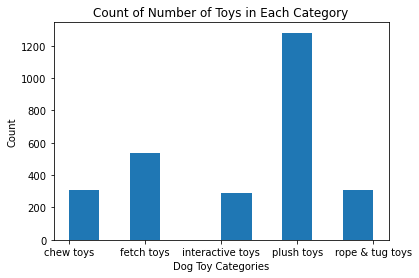

In [172]:
# Going to plot categories and subcategories 

plt.hist(df['cat'])
plt.xlabel('Dog Toy Categories')
plt.ylabel('Count')
plt.title("Count of Number of Toys in Each Category");

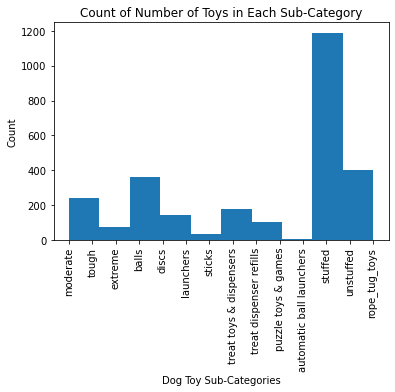

In [173]:
plt.hist(df['subcat'])
plt.xlabel('Dog Toy Sub-Categories')
plt.ylabel('Count')
plt.title("Count of Number of Toys in Each Sub-Category")
plt.xticks(rotation=90);

### Looking at the distribution of Ratings in Categories and Subcategories 

In [174]:
df['cat'].value_counts()

plush toys          1281
fetch toys           540
chew toys            310
rope & tug toys      309
interactive toys     290
Name: cat, dtype: int64

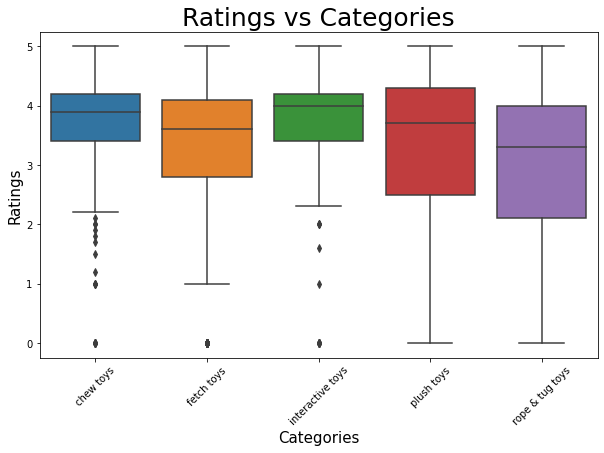

In [175]:
plt.figure(figsize=(10, 6))
cat = sns.boxplot(x='cat', y='rating', data=df)
cat.set_xticklabels(cat.get_xticklabels(), rotation=45)
cat.set_title('Ratings vs Categories', size=25) # What value of rating is this?
cat.set_xlabel('Categories', size=15)
cat.set_ylabel('Ratings', size=15);

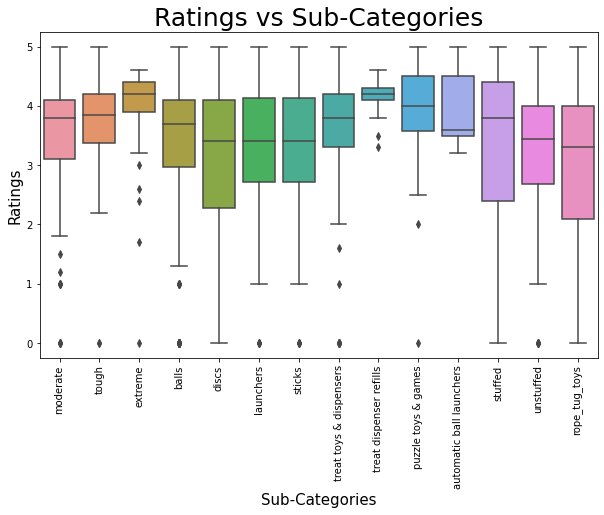

In [176]:
plt.figure(figsize=(10, 6))
subcat = sns.boxplot(x='subcat', y='rating', data=df)
subcat.set_xticklabels(subcat.get_xticklabels(), rotation=90)
subcat.set_title('Ratings vs Sub-Categories', size=25) # What value of rating is this?
subcat.set_xlabel('Sub-Categories', size=15)
subcat.set_ylabel('Ratings', size=15);

### Looking at Combined Text
Going to try tokenizing and then removing stop words

In [177]:
df['combined_text'][0]

'Every puppy needs a pacifier to soothe teething pain, look cute, and exercise his chompers for a life filled with treats! The Nylabone Puppy Teething Pacifier Dog Chew Toy gives your brand-new pup two chews to choose from. Both have raised nubs that stimulate gums and teeth, and both cost less than replacing a chewed up pair of shoes.Designed for teething puppies up to 25 pounds - Not recommended for adult dogs or puppies with any permanent teeth., Recommended for puppies up to 25 pounds only. Every dog plays differently and, since not all toys are created equal, it’s always best to keep a close watch on your pup in case things get ruff. Supervised play will help toys last longer and most importantly keep your pal safe. No dog toy is truly indestructible, so always remove the toy from playtime if pieces begin to break off.,See all items by NylaboneDesigned to encourage positive play and teach your puppy healthy chewing habits from an early age., Keep them happy, busy and entertained w

In [178]:
# sentence tokenizer
print(len(sent_tokenize(df['combined_text'][0].lower())))
print(len(sent_tokenize(df['combined_text'][1].lower())))
print(len(sent_tokenize(df['combined_text'][2].lower())))

49
38
50


In [179]:
df['combined_sent_len'] = 0
for i in range(len(df.index)):
    df['combined_sent_len'][i] = len(sent_tokenize(df['combined_text'][i].lower()))

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
# df.head()

In [181]:
df['combined_word_leng'] = 0
for i in range(len(df.index)):
    df['combined_word_leng'][i] = len(word_tokenize(df['combined_text'][i].lower()))

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [182]:
# df.head()

Going to look at removing stop words and observing length of reviews.  
*Used lessons 5.03 and 5.04 on NLP and Sentiment Analysis for this part*

In [183]:
# To first just look at the stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [184]:
tokenizer = RegexpTokenizer(r'\w+')

In [185]:
df['combined_text'][0]

'Every puppy needs a pacifier to soothe teething pain, look cute, and exercise his chompers for a life filled with treats! The Nylabone Puppy Teething Pacifier Dog Chew Toy gives your brand-new pup two chews to choose from. Both have raised nubs that stimulate gums and teeth, and both cost less than replacing a chewed up pair of shoes.Designed for teething puppies up to 25 pounds - Not recommended for adult dogs or puppies with any permanent teeth., Recommended for puppies up to 25 pounds only. Every dog plays differently and, since not all toys are created equal, it’s always best to keep a close watch on your pup in case things get ruff. Supervised play will help toys last longer and most importantly keep your pal safe. No dog toy is truly indestructible, so always remove the toy from playtime if pieces begin to break off.,See all items by NylaboneDesigned to encourage positive play and teach your puppy healthy chewing habits from an early age., Keep them happy, busy and entertained w

In [186]:
# This cell takes a bit to run 
df['tokenized_combined'] = 0
for i in range(len(df.index)):
    combined_tokens = tokenizer.tokenize(df['combined_text'][i].lower())
    no_stop_words = [token for token in combined_tokens if token not in stopwords.words('english')]
    df['tokenized_combined'][i] = no_stop_words

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [187]:
# df.head()

**Looking at Most Frequently Used Words**
Using TfidfVectorizer

In [188]:
# Instantiate the transformer.
tvec = TfidfVectorizer(stop_words='english')

Ok need to work on getting the vectorizer inside the list!

In [189]:
tvec.fit_transform(df['combined_text']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [190]:
# creating the vectorized words dataframe
word_vector_df = pd.DataFrame(tvec.fit_transform(df['combined_text']).toarray(),
                  columns=tvec.get_feature_names())
word_vector_df

# Is there a way to get the word as the column? 

,00,000,00pm,06,061820,07,10,100,1000,10000,...,zoomies,zooming,zooms,zucchini,zucchinis,zuke,zukes,zumi,zuula,çute
0,0.0,0.0,0.0,0.0,0.0,0.0,0.024496,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.064798,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.027638,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
df.shape

(2730, 13)

In [192]:
# get count of top-occurring words
top_words_tf = {}
for i in word_vector_df.columns:
    top_words_tf[i] =  word_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

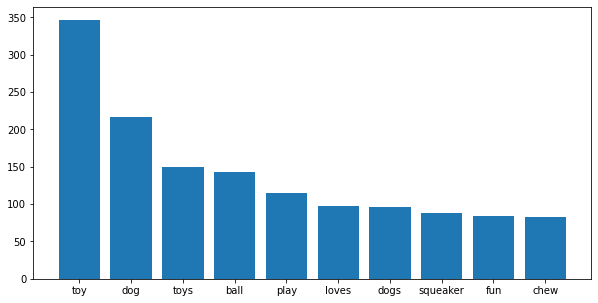

In [193]:
plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_freq_tf[0][:10], most_freq_tf[1][:10]);

Need to get the stop words out of the combined text! 

In [194]:
# df.head()

**Making my own stop word lists**

In [195]:
stopwords = stopwords.words('english') + ['dog', 'toy', 'dogs', 'toys', 'one']

In [196]:
# Instantiate the transformer.
tvec_stopwords = TfidfVectorizer(stop_words=stopwords)

In [197]:
# creating the vectorized words dataframe
stopword_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(df['combined_text']).toarray(),
                  columns=tvec_stopwords.get_feature_names())
stopword_vector_df

,00,000,00pm,06,061820,07,10,100,1000,10000,...,zoomies,zooming,zooms,zucchini,zucchinis,zuke,zukes,zumi,zuula,çute
0,0.0,0.0,0.0,0.0,0.0,0.0,0.024274,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.065642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.027665,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
# get count of top-occurring words
top_stopwords_tf = {}
for i in stopword_vector_df.columns:
    top_stopwords_tf[i] =  stopword_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

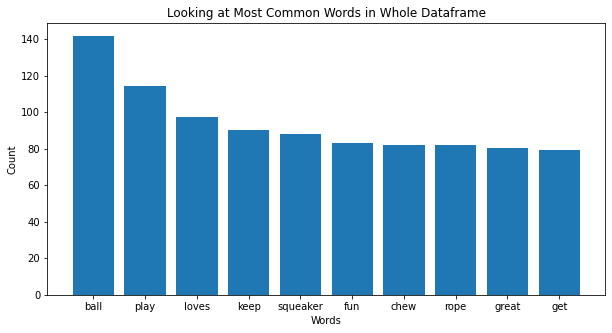

In [199]:
plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10])
plt.title('Looking at Most Common Words in Whole Dataframe')
plt.xlabel('Words')
plt.ylabel('Count');

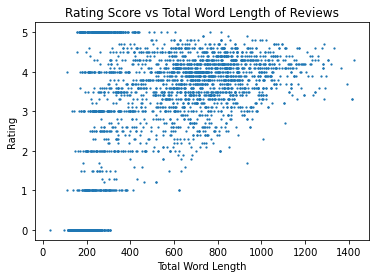

In [200]:
plt.scatter(x=df['combined_word_leng'], y=df['rating'],
           s=1.5)
plt.title("Rating Score vs Total Word Length of Reviews")
plt.xlabel("Total Word Length")
plt.ylabel("Rating");

### Using spaCy for more cleaning and EDA 

In [201]:
nlp_lg = spacy.load('en_core_web_lg')

In [202]:
# messing around on first review to see what the vectors look like 
tokens = nlp_lg(df['combined_text'][0])
vect_list = list(tokens.vector)
np.array(vect_list[:20]) # Don't want to look at all of them 

array([-0.03609477,  0.16643533, -0.17682464, -0.1015739 ,  0.06390265,
       -0.03432131, -0.02092139, -0.18000372,  0.01560968,  2.0963402 ,
       -0.16808493,  0.09069827,  0.01385793, -0.05591336, -0.12228118,
       -0.05369793, -0.0561469 ,  1.0300909 , -0.16845153,  0.0064817 ],
      dtype=float32)

In [203]:
# Creating a new column in dataframe that has all the vectors in one list
df['token_vectors'] = ''
for i in df.index:
#     print(i)
    doc = nlp_lg(df.loc[i, 'combined_text'])
    df['token_vectors'][i] = list(doc.vector)
# data['token_vectors']

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
# df.head()

In [205]:
# Going to average the vectors for each toy
df['avg_vector'] = ''
for i in df.index:
    vector_sum = 0
    for j in df['token_vectors'][i]:
        vector_sum += j
    avg = vector_sum / len(df['token_vectors'][i])
    df['avg_vector'][i] = avg

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
# df.head()

### Looking at Reviews and Description of Each category (maybe will look at subcategory) 

**Chew Toys**

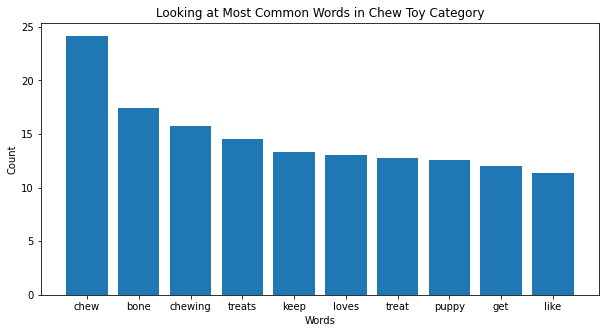

In [218]:
chew_reviews_df = df['combined_text'][df['cat'] == 'chew toys']
chew_reviews_df = pd.DataFrame(chew_reviews_df)
chew_reviews_df

# creating the vectorized words dataframe
chew_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(chew_reviews_df['combined_text']).toarray(),
                  columns=tvec_stopwords.get_feature_names())
chew_vector_df

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in chew_vector_df.columns:
    top_stopwords_tf[i] =  chew_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10])
plt.title('Looking at Most Common Words in Chew Toy Category')
plt.xlabel('Words')
plt.ylabel('Count');

**Fetch Toys**

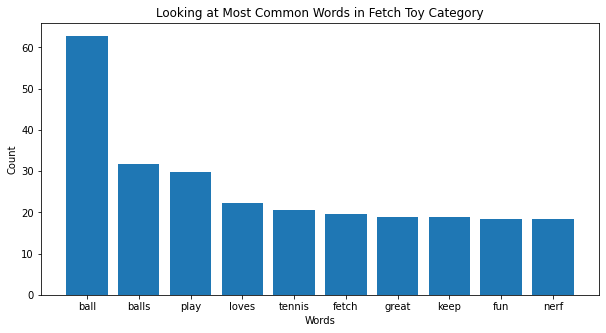

In [219]:
fetch_reviews_df = df['combined_text'][df['cat'] == 'fetch toys']
fetch_reviews_df = pd.DataFrame(fetch_reviews_df)
fetch_reviews_df

# creating the vectorized words dataframe
fetch_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(fetch_reviews_df['combined_text']).toarray(),
                  columns=tvec_stopwords.get_feature_names())
# chew_vector_df

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in fetch_vector_df.columns:
    top_stopwords_tf[i] =  fetch_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10])
plt.title('Looking at Most Common Words in Fetch Toy Category')
plt.xlabel('Words')
plt.ylabel('Count');

**Interactive Toys**

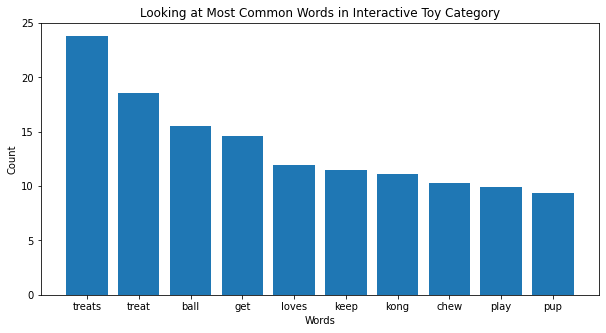

In [220]:
interactive_reviews_df = df['combined_text'][df['cat'] == 'interactive toys']
interactive_reviews_df = pd.DataFrame(interactive_reviews_df)

# creating the vectorized words dataframe
interactive_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(interactive_reviews_df['combined_text']).toarray(),
                  columns=tvec_stopwords.get_feature_names())

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in interactive_vector_df.columns:
    top_stopwords_tf[i] =  interactive_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10])
plt.title('Looking at Most Common Words in Interactive Toy Category')
plt.xlabel('Words')
plt.ylabel('Count');

**Plush Toys**

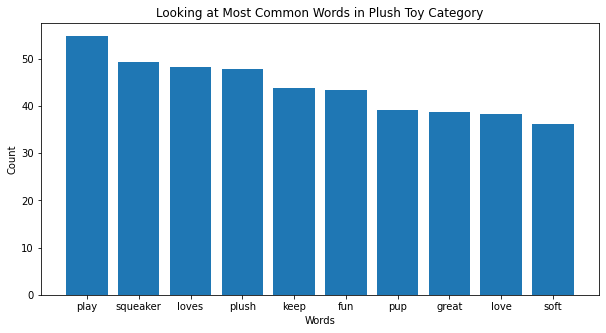

In [221]:
plush_reviews_df = df['combined_text'][df['cat'] == 'plush toys']
plush_reviews_df = pd.DataFrame(plush_reviews_df)

# creating the vectorized words dataframe
plush_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(plush_reviews_df['combined_text']).toarray(),
                  columns=tvec_stopwords.get_feature_names())

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in plush_vector_df.columns:
    top_stopwords_tf[i] =  plush_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10])
plt.title('Looking at Most Common Words in Plush Toy Category')
plt.xlabel('Words')
plt.ylabel('Count');

**Rope & Tug Toys**

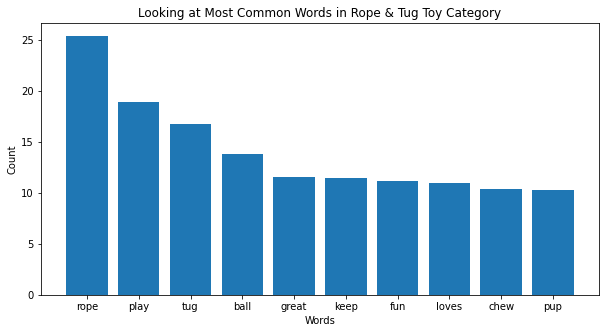

In [222]:
ropetug_reviews_df = df['combined_text'][df['cat'] == 'rope & tug toys']
ropetug_reviews_df = pd.DataFrame(ropetug_reviews_df)

# creating the vectorized words dataframe
ropetug_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(ropetug_reviews_df['combined_text']).toarray(),
                  columns=tvec_stopwords.get_feature_names())

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in ropetug_vector_df.columns:
    top_stopwords_tf[i] =  ropetug_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10])
plt.title('Looking at Most Common Words in Rope & Tug Toy Category')
plt.xlabel('Words')
plt.ylabel('Count');

In [212]:
# df.head()

### Looking at plots of the different vectors with each category

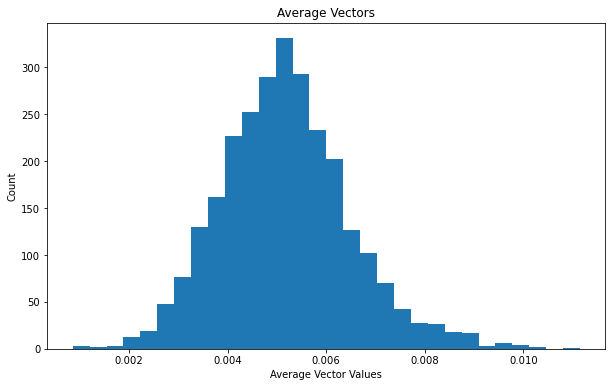

In [213]:
plt.figure(figsize=(10, 6))
plt.hist(df['avg_vector'], bins=30)
plt.title("Average Vectors")
plt.xlabel('Average Vector Values')
plt.ylabel('Count');

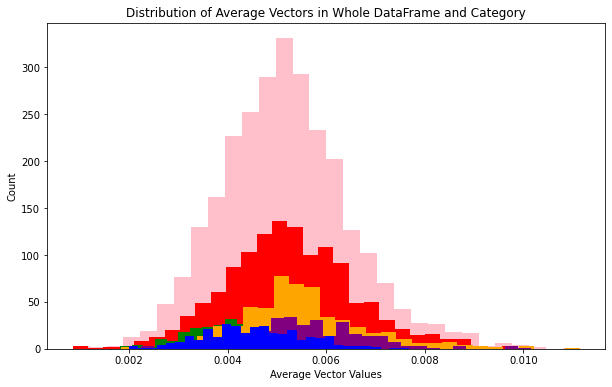

In [235]:
plt.figure(figsize=(10, 6))
plt.hist(df['avg_vector'], bins=30, color='pink')
plt.hist(df[(df['cat'] == 'plush toys')]['avg_vector'], bins=30, color='red')
plt.hist(df[(df['cat'] == 'interactive toys')]['avg_vector'], bins=30, color='green')
plt.hist(df[(df['cat'] == 'fetch toys')]['avg_vector'], bins=30, color='orange')
plt.hist(df[(df['cat'] == 'rope & tug toys')]['avg_vector'], bins=30, color='purple')
plt.hist(df[(df['cat'] == 'chew toys')]['avg_vector'], bins=30, color='blue')
plt.title('Distribution of Average Vectors in Whole DataFrame and Category')
plt.xlabel('Average Vector Values')
plt.ylabel('Count');

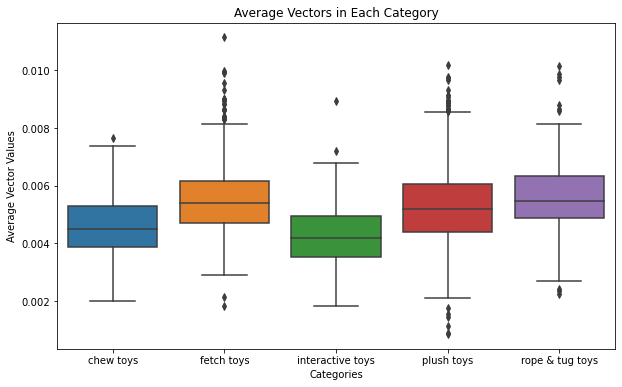

In [237]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="cat", y="avg_vector", data=df)
ax.set_title('Average Vectors in Each Category')
ax.set_xlabel('Categories')
ax.set_ylabel('Average Vector Values');

# Explorting dataframe

In [240]:
# Uncomment to run 
df.to_csv('data/chewy.csv', index=False)